In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def model(w, b, x):
    return w*x + b

def cost_function(w, b, x, y):
    cost = 0.5/n * (np.square(y-(w*x+b)).sum())
    return cost

x = np.array([0, 0.5, 0.8, 1.1, 1.5, 1.9, 2.2, 2.4, 2.6, 3])
y = np.array([0.9, 2.1, 2.7, 3.1, 4.1, 4.8, 5.1, 5.9, 6, 7])
n = 10

共100轮   参数为：(1.9470347895265503, 1.0161190195617722)   Loss：0.00948308315544266


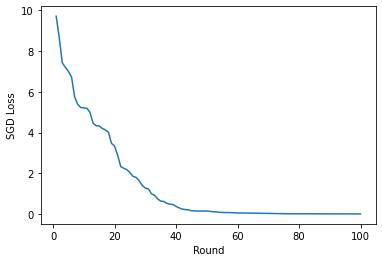

[9.714094741, 8.66699791651228, 7.41836264838132, 7.207940622389424, 7.00395437805706, 6.728976671598328, 5.762095128450225, 5.383936728282469, 5.231064578232213, 5.21378403623536, 5.196710070784566, 4.99476641167932, 4.4669061673901425, 4.340465115679336, 4.327052016164646, 4.205024067346584, 4.134626346366356, 4.0186063572701505, 3.473775031344448, 3.3414346721829036, 2.8867334302044565, 2.3365300993648854, 2.2483827509247707, 2.184140675492765, 2.0385400015650132, 1.8526164801890748, 1.7996905046993523, 1.6355013921370611, 1.4065539739500885, 1.2780794077092699, 1.231586009540073, 0.9944641832579401, 0.9265882421440049, 0.7478375361073323, 0.6418932290176518, 0.6194879518302228, 0.5311348399627741, 0.4838617122477733, 0.46914753764691036, 0.37816254680262373, 0.3048299142889135, 0.2457591710159524, 0.22327292544035837, 0.20665599291475445, 0.16668574314912155, 0.15425905837471576, 0.14978534232426408, 0.14987792806768585, 0.1499696241062355, 0.15006043861752622, 0.13644447164231077,

In [2]:
w = 0
b = 0
sgd_cost_all = []
lr = 0.01

def sgd(w,b,x,y):
    i = random.randint(0, 9)
    y_hat = model(w,b,x[i])
    dw = (y_hat-y[i])*x[i]
    db = y_hat-y[i]
    
#     y_hat = model(w,b,x)
#     dw = (1.0/n) * (((y_hat-y)*x).sum())
#     db = (1.0/n) * ((y_hat-y).sum())
    
    w = w - lr*dw
    b = b - lr*db
    return w, b

for i in range(100):
    w, b = sgd(w,b,x,y) 
    cost = cost_function(w, b, x, y)
    sgd_cost_all.append(cost)
print('共{}轮   参数为：({}, {})   Loss：{}'.format(len(sgd_cost_all), w, b, cost))  

axis_x = list(range(1,len(sgd_cost_all)+1,1))
axis_y = sgd_cost_all
plt.xlabel('Round')
plt.ylabel('SGD Loss')
plt.plot(axis_x,axis_y)
plt.show()

print(sgd_cost_all)

共56轮   参数为：(1.9567551432509727, 0.975067226944482)   Loss：0.010667249005483895


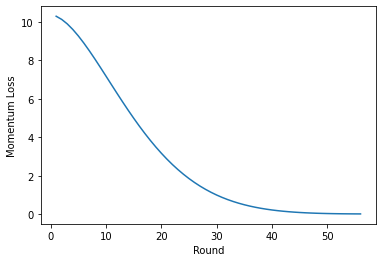

[10.301954689989604, 10.137006107380827, 9.904900393328857, 9.615724711737773, 9.279204599333378, 8.90455272574467, 8.50036101089944, 8.074528952679946, 7.634221858883311, 7.185853453570331, 6.735088039419549, 6.286858046149858, 5.845393382538005, 5.414259538667838, 4.9964018588257195, 4.59419382719296, 4.209487581644701, 3.8436651990956388, 3.4976895825040417, 3.1721540283834067, 2.867329767916843, 2.5832109578403775, 2.319556752325422, 2.0759302171443332, 1.851733955258585, 1.646242401245948, 1.4586308131037755, 1.2880010461555735, 1.1334042370790947, 0.993860558309031, 0.8683762259074005, 0.7559579589286183, 0.6556250966595579, 0.5664195830607154, 0.48741402630403796, 0.4177180363964732, 0.3564830362762348, 0.3029057321425128, 0.2562304177012924, 0.21575027496376495, 0.18080782162379766, 0.15079464220083394, 0.12515052733607632, 0.10336213308998801, 0.08496125997781945, 0.06952283992586623, 0.05666270842833926, 0.04603522899720208, 0.03733082756425661, 0.030273485834612403, 0.024618

In [3]:
lr = 0.01
w = 0
b = 0
vw = 0
vb = 0
cost = 100
momentum_cost_all = []

def momentum(w, b, vw, vb, x, y):
    beta = 0.9
    
#     # 每次只用一个样本
#     i = random.randint(0, 9)
#     y_hat = model(w,b,x[i])
#     dw = (y_hat-y[i])*x[i]
#     db = y_hat-y[i]    

    # 使用全部样本
    y_hat = model(w,b,x)
    dw = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    
    vw = beta*vw + (1-beta)*dw
    vb = beta*vb + (1-beta)*db
    w = w - lr*vw
    b = b - lr*vb
    return w, b, vw, vb


while cost>=0.012007084092230082:
    w, b, vw, vb = momentum(w, b, vw, vb, x, y)
    cost = cost_function(w, b, x, y)
    momentum_cost_all.append(cost)
print('共{}轮   参数为：({}, {})   Loss：{}'.format(len(momentum_cost_all), w, b, cost))  

axis_x = list(range(1,len(momentum_cost_all)+1,1))
axis_y = momentum_cost_all
plt.xlabel('Round')
plt.ylabel('Momentum Loss')
plt.plot(axis_x,axis_y)
plt.show()

print(momentum_cost_all)

共237轮   参数为：(1.8867159761429857, 1.1819650734701006)   Loss：0.011831640615076109


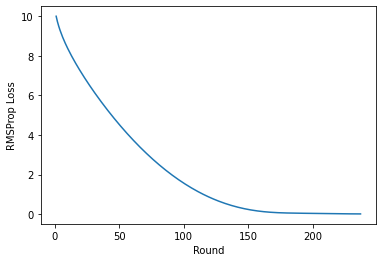

[9.996228796173966, 9.718271484373572, 9.489851704937667, 9.290226339297318, 9.109804369282495, 8.94325514029502, 8.787269915718424, 8.63963711693153, 8.498797816871955, 8.363608326160614, 8.23320309218351, 8.10691060096314, 7.984199246046732, 7.864641086789053, 7.747886774019908, 7.633647712703868, 7.521683066175725, 7.41179008946219, 7.303796807046947, 7.197556376731547, 7.092942688937419, 6.989846886454519, 6.8881745803120955, 6.787843599308056, 6.688782153728787, 6.590927324180974, 6.494223808268007, 6.39862287371772, 6.304081478271435, 6.210561525374756, 6.118029231295626, 6.026454584312591, 5.93581088047583, 5.846074323438893, 5.757223678203204, 5.669239970466325, 5.58210622473413, 5.495807235532564, 5.410329367001741, 5.325660376922636, 5.2417892618527455, 5.158706120560449, 5.076402033371371, 4.9948689553910075, 4.91409962186047, 4.834087464147039, 4.754826535077221, 4.676311442493954, 4.5985372900672195, 4.521499624512984, 4.445194388482858, 4.369617878478986, 4.29476670722811

In [4]:
lr = 0.01
w = 0
b = 0
sw =0
sb = 0
cost = 100
rmsprop_cost_all = []


def rmsprop(w, b, sw, sb, x, y):
    epsilon=1e-8
    beta = 0.9
    
#     # 每次只用一个样本
#     i = random.randint(0, 9)
#     y_hat = model(w,b,x[i])
#     dw = (y_hat-y[i])*x[i]
#     db = y_hat-y[i]  
    
    # 使用全部样本    
    y_hat = model(w, b, x)
    dw = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    
    sw = beta*sw+(1-beta)*dw*dw
    sb = beta*sb+(1-beta)*db*db
    w = w - lr*dw / (np.sqrt(sw)+epsilon)
    b = b - lr*db / (np.sqrt(sb)+epsilon)
    return w, b, sw, sb


while cost>=0.012007084092230082:
    w, b, sw, sb = rmsprop(w, b, sw, sb, x, y)
    cost = cost_function(w, b, x, y)
    rmsprop_cost_all.append(cost)
print('共{}轮   参数为：({}, {})   Loss：{}'.format(len(rmsprop_cost_all), w, b, cost))   

axis_x = list(range(1,len(rmsprop_cost_all)+1,1))
axis_y = rmsprop_cost_all
plt.xlabel('Round')
plt.ylabel('RMSProp Loss')
plt.plot(axis_x,axis_y)
plt.show()

print(rmsprop_cost_all)

共1078轮   参数为：(1.8830717992528994, 1.1843703788481117)   Loss：0.011992405821582659


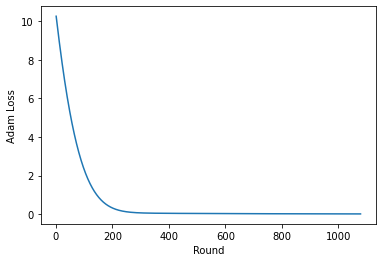

[10.264311600198777, 10.139906688147619, 10.016298446691085, 9.893499770594431, 9.771523234662343, 9.650381063359823, 9.530085102153377, 9.410646790768352, 9.292077138533596, 9.174386701957856, 9.057585564654346, 8.941683319700877, 8.826689054493915, 8.712611338126093, 8.599458211288763, 8.487237178674633, 8.3759552038306, 8.265618706388219, 8.15623356157889, 8.047805101922947, 7.940338120966878, 7.833836878930512, 7.728305110116418, 7.623746031926939, 7.520162355329948, 7.417556296612495, 7.315929590261845, 7.21528350281573, 7.115618847527713, 7.0169359996991005, 6.919234912535784, 6.822515133396185, 6.726775820305218, 6.632015758618394, 6.538233377729799, 6.445426767727527, 6.353593695909893, 6.262731623085514, 6.172837719589761, 6.0839088809591955, 5.995941743214342, 5.908932697709237, 5.822877905513972, 5.737773311303489, 5.653614656732401, 5.570397493281557, 5.488117194567433, 5.4067689681101765, 5.326347866560381, 5.246848798388378, 5.168266538043012, 5.090595735589652, 5.0138309

In [5]:
lr = 0.01
w = 0
b = 0
vw = 0
vb = 0
sw =0
sb = 0
cost = 100
adam_cost_all = []

def adam(t, w, b, vw, vb, sw, sb, x, y):
    epsilon=1e-8
    beta_1 = 0.9
    beta_2 = 0.999
    
#     # 每次只用一个样本
#     i = random.randint(0, 9)
#     y_hat = model(w,b,x[i])
#     dw = (y_hat-y[i])*x[i]
#     db = y_hat-y[i]  
    
    # 使用全部样本    
    y_hat = model(w, b, x)
    dw = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    
    # Momentum
    vw = beta_1*vw + (1-beta_1)*dw
    vb = beta_1*vb + (1-beta_1)*db
    vw_cor = vw/(1-beta_1**t)
    vb_cor = vb/(1-beta_1**t)
    
    # RMSprop
    sw = beta_2*sw+(1-beta_2)*dw*dw
    sb = beta_2*sb+(1-beta_2)*db*db
    sw_cor = sw/(1-beta_2**t)
    sb_cor = sb/(1-beta_2**t)    
    
    w = w - lr*vw_cor / (np.sqrt(sw_cor)+epsilon)
    b = b - lr*vb_cor / (np.sqrt(sb_cor)+epsilon)
    return w, b, vw, vb, sw, sb

t = 1
while cost>=0.012007084092230082:
    w, b, vw, vb, sw, sb = adam(t, w, b, vw, vb, sw, sb, x, y)
    cost = cost_function(w, b, x, y)
    adam_cost_all.append(cost)
    t = t + 1
print('共{}轮   参数为：({}, {})   Loss：{}'.format(len(adam_cost_all), w, b, cost))   

axis_x = list(range(1,len(adam_cost_all)+1,1))
axis_y = adam_cost_all
plt.xlabel('Round')
plt.ylabel('Adam Loss')
plt.plot(axis_x,axis_y)
plt.show()

print(adam_cost_all)

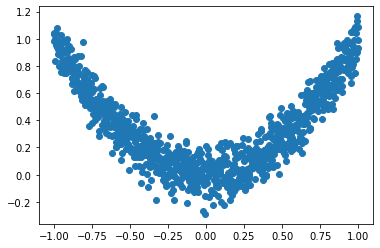

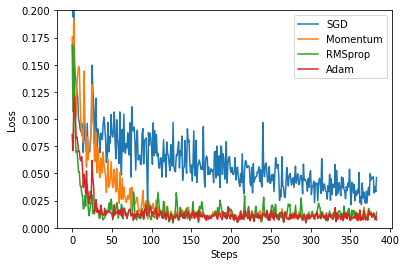

In [6]:
import torch
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.autograd import Variable

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.input = torch.nn.Linear(1,30)
        self.predict = torch.nn.Linear(30,1)

    def forward(self, x):
        x = F.relu((self.input(x)))
        x = self.predict(x)
        return x


LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

plt.scatter(x.numpy(), y.numpy())
plt.show()

torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True)


net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr = LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr = LR, momentum=0.9)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr = LR, alpha = 0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr = LR, betas=(0.9, 0.999))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss() # 均方损失
losses_all = [[],[],[],[]] # 作记录

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(loader):
        for net, opt, losses in zip(nets, optimizers, losses_all):
            output = net(b_x)          
            loss = loss_func(output, b_y)   
            opt.zero_grad()            
            loss.backward()            
            opt.step()  
            losses.append(loss.data.numpy()) #把损失放进losses_all的列表里面


labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, losses in enumerate(losses_all):
    plt.plot(losses, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()    

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

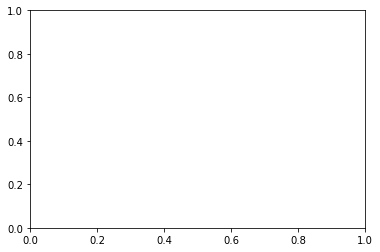

In [7]:
predict_all = [[],[],[],[]]
for i in range(len(x)):
    for n, net in zip([0,1,2,3],nets):
        predict_all[n].append(net(x[i]))

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, predict in enumerate(predict_all):
    plt.plot(predict, label=labels[i])
plt.legend(loc='best')
plt.show()